# Лабараторная №1. Основый предобработки данных 

#### Ковшов Валерий
#### Короп Анастасия
#### Короп Тимур

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path = 'credit_3530903_70302.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
credit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0<=X<200,36.0,existing paid,furniture/equipment,9034.0,100<=X<500,<1,male single,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,bad
497,no checking,24.0,critical/other existing credit,furniture/equipment,1585.0,<100,4<=X<7,male single,life insurance,40.0,own,2.0,skilled,1.0,yes,good
498,0<=X<200,18.0,existing paid,radio/tv,0.0,<100,>=7,male mar/wid,real estate,32.0,own,1.0,unskilled resident,1.0,yes,good
499,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,male div/sep,car,28.0,own,2.0,skilled,2.0,yes,good


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     501 non-null    object 
 1   duration            501 non-null    float64
 2   credit_history      501 non-null    object 
 3   purpose             501 non-null    object 
 4   credit_amount       501 non-null    float64
 5   savings_status      501 non-null    object 
 6   employment          501 non-null    object 
 7   personal_status     501 non-null    object 
 8   property_magnitude  501 non-null    object 
 9   age                 501 non-null    float64
 10  housing             474 non-null    object 
 11  existing_credits    501 non-null    float64
 12  job                 501 non-null    object 
 13  num_dependents      501 non-null    float64
 14  foreign_worker      501 non-null    object 
 15  class               501 non-null    object 
dtypes: float

### 1. В какой шкале представлены все признаки в наборе?

checking_status - порядковая<br>
duration - абсолютная<br>
credit_history - номинальная<br>
purpose - номинальная<br>
credit_amount - абсолютная<br>
savings_status - порядковая<br>
employment - порядковая<br>
personal_status - номинальная<br>
property_magnitude - номинальная<br>
age - абсолютная<br>
housing - номинальная<br> 
existing_credits - абсолютная<br>
job - порядковая<br>
num_dependents - абсолютная<br> 
foreign_worker - номинальная<br>
class - номинальная<br>

### 2. Укажите признак с наименьшей дисперсией.

Признак с наименьшей дисперсией: num_dependents

In [5]:
credit_df.var()

duration            1.465e+02
credit_amount       2.657e+07
age                 1.378e+02
existing_credits    3.231e-01
num_dependents      1.233e-01
dtype: float64

### 3. Среднее какого признака отличается для двух классов сильнее всего?

Среднее признака credit_amount

In [6]:
credit_df.loc[credit_df['class'] == 'good'].mean()

duration              18.456
credit_amount       2794.648
age                   35.821
existing_credits       1.398
num_dependents         1.140
dtype: float64

In [7]:
credit_df.loc[credit_df['class'] == 'bad'].mean()

duration              25.255
credit_amount       4806.358
age                   35.029
existing_credits       1.380
num_dependents         1.153
dtype: float64

### 4. В каком классе больше всего skilled работников?

В классе good больше всего skilled работников

In [8]:
credit_df[credit_df['job'] == 'skilled']['class'].value_counts()

good    232
bad      80
Name: class, dtype: int64

### 5. Есть ли в наборе признаки с выбросами? Какие?

Да, credit_amount, duration, age

<AxesSubplot:>

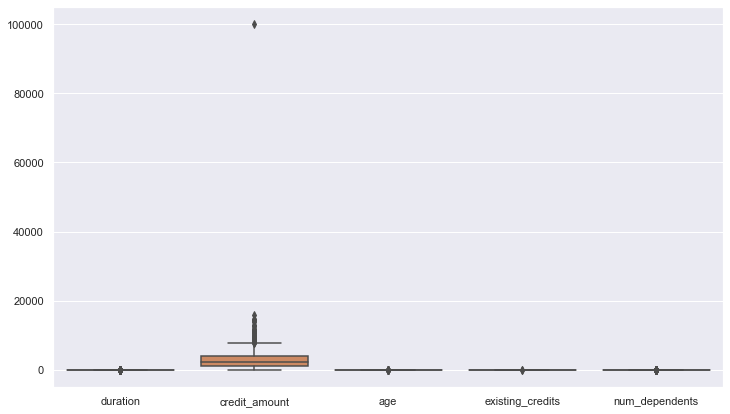

In [9]:
plt.subplots(figsize = (12,7))
sns.boxplot(data = credit_df)

<AxesSubplot:>

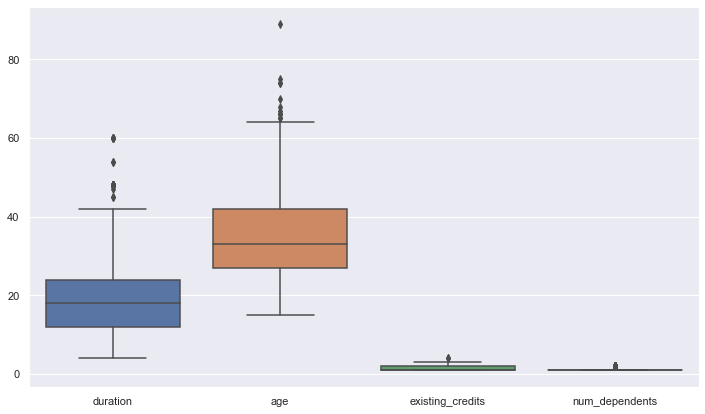

In [10]:
fig, axs = plt.subplots(figsize = (12,7))
sns.boxplot(data = credit_df[['duration','age', 'existing_credits', 'num_dependents']])

<AxesSubplot:>

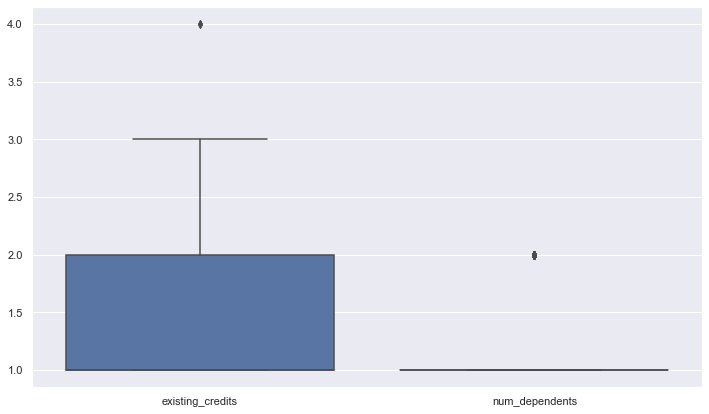

In [11]:
fig, axs = plt.subplots(figsize = (12,7))
sns.boxplot(data = credit_df[['existing_credits', 'num_dependents']])

In [12]:
credit_df['existing_credits'] = credit_df.existing_credits.clip(lower = credit_df.existing_credits.quantile(0.05), 
                                                                upper = credit_df.existing_credits.quantile(0.95))
credit_df['num_dependents'] = credit_df.num_dependents.clip(lower = credit_df.num_dependents.quantile(0.05), 
                                                                upper = credit_df.num_dependents.quantile(0.95))

<AxesSubplot:>

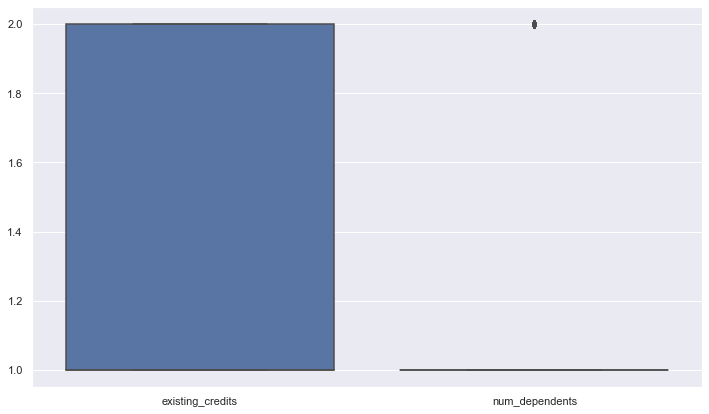

In [13]:
plt.subplots(figsize = (12,7))
sns.boxplot(data = credit_df[['existing_credits', 'num_dependents']])

### 6. Сколько пропущенных значений в наборе?

27 пропущенных значений

In [14]:
credit_df.isnull().sum()

checking_status        0
duration               0
credit_history         0
purpose                0
credit_amount          0
savings_status         0
employment             0
personal_status        0
property_magnitude     0
age                    0
housing               27
existing_credits       0
job                    0
num_dependents         0
foreign_worker         0
class                  0
dtype: int64

### 7. Попытайтесь заполнить пропущенные значения.

In [15]:
credit_df = credit_df.fillna('NaN')
credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
purpose               0
credit_amount         0
savings_status        0
employment            0
personal_status       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
foreign_worker        0
class                 0
dtype: int64

In [16]:
credit_df[0:10]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,male single,no known property,35.0,for free,1.0,unskilled resident,2.0,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,male single,life insurance,53.0,own,1.0,skilled,1.0,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,male single,car,35.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,male div/sep,real estate,61.0,NaN,1.0,unskilled resident,1.0,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,male mar/wid,car,28.0,NaN,2.0,high qualif/self emp/mgmt,1.0,yes,bad


### 8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

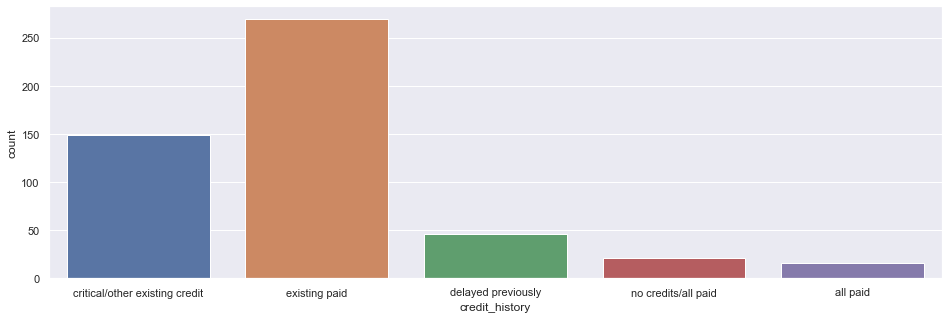

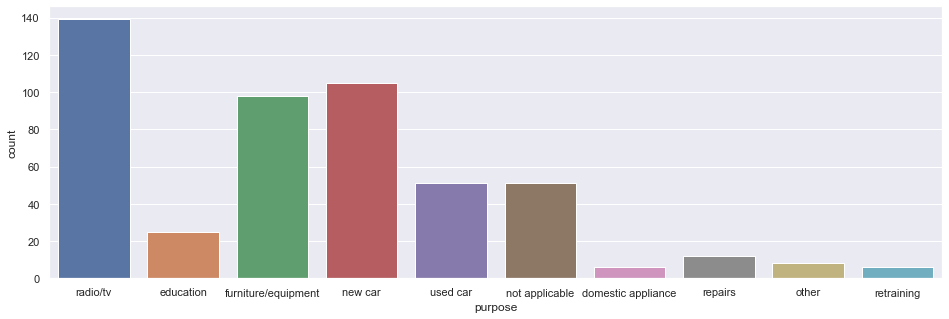

In [17]:
#Номинальные

plt.subplots(figsize=(16, 5))
sns.countplot(x='credit_history', data=credit_df);

plt.subplots(figsize=(16, 5))
sns.countplot(x='purpose', data=credit_df);

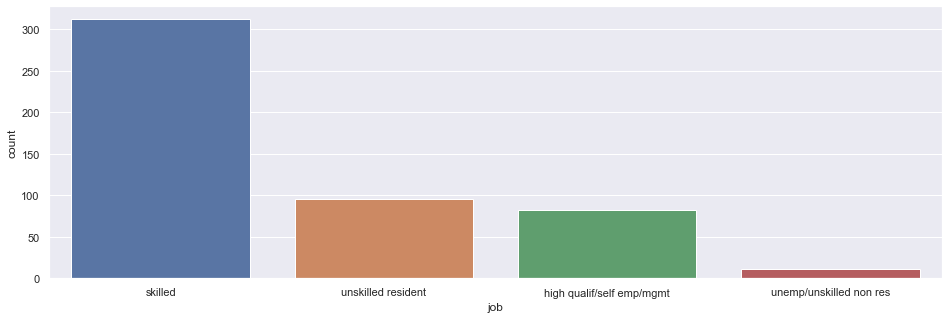

In [18]:
#Порядковые

plt.subplots(figsize=(16, 5))
sns.countplot(x='job', data=credit_df);

<AxesSubplot:ylabel='Density'>

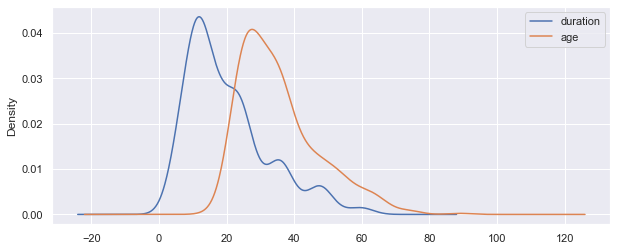

In [19]:
#Абсолютные

credit_df[['duration', 'age']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

### 9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

Выводы:
- чем больше сумма, тем на больший срок её берут (видно на графике credit_amount + duration и тепловой карте)
- молодые люди чаще берут небольшие кредиты на небольшое время (видно на графиках credit_amount + age, credit_amount + duration)

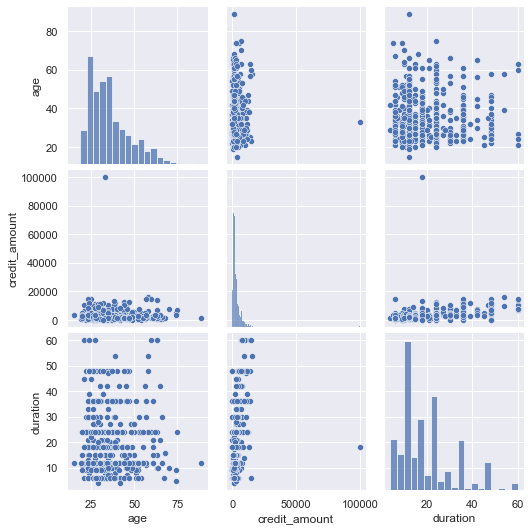

In [20]:
num_columns = list(set(['credit_amount','age','duration']))
sns.pairplot(credit_df[num_columns])

<AxesSubplot:>

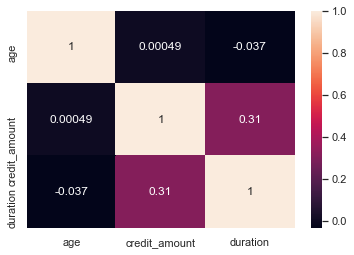

In [21]:
corr_matrix = credit_df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

### 10. Какой признак(и) имеет смысл стандартизировать? Почему?

checking_status и employment потому что и тот и другй признак хранят интервальные значения, которые можно было бы отобразить на отрезок от 0 до 1 вместо использования строки с логическим выражением, которая лишает нас возможности использовать нормализацию в полной мере.

### 11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.

Рабочий стаж на последнем месте работы (порядковая шкала)<br>Данный признак показывает, как долго человек устроен на своем последнем месте работы - эта информация поможет выяснить, находится ли человек на испытательном сроке/закрепился ли он на рабочем месте. Данная информация поможет избежать риска того, что вскоре после получения кредита у человека возникнут проблемы, и он останется без работы.